In [1]:
%reload_ext autoreload
%autoreload 2
from VirusHostNetworkAnalysis.pipeline import Pipeline

# Global Variables

**INPUT_FILE:** The path to the VHIP output, which is a tsv file.<br>
**NUM_SWAPS:** The number of switches to make for each iteration of the Configuration Model. <br>
**NUM_RUNS:** The number of times to run the Configuration. Statistics are recalculated after each run to create plots that will determine the number of swaps to make. <br>
**NULL_TYPE:** Can be "CM", "ER", or "None" <br>
**P_CUTOFF:** The probability to be used to randomly fill the ER matrix. <br> 
**PROBABILITY_MATRIX:** True or False. If True, will calculate the probability matrix as well as the prediction matrix. If only the prediciton matrix is needed, can be set to False to save time. <br>
**NUM_CORES:** The number of cores to be used for multiple processing tasks. If not specified, the default is 6 cores.<br>
**PERCENT_REARRANGE:** ?<br>
**SINGLE_COLOR:** Enter a single color name. The default is "indigo".  The color will be used for predicted interactions and white will be used for non-predicted interactions.<br>
**COLORMAP:** For probability heatmaps, enter a list of 5 colors. The colors will be used to create a gradient, where the middle color represents 50% probability. The default is color_map=["red", "lightpink", "white", "lightskyblue", "blue"]. <br>
**COLOR_RANGE:** For probability heatmaps, enter the range of values to be used for the color gradient. This can change how far each color stretches. The default is [0, 0.2, 0.45, 0.55, 0.8, 1]. When using the default range and colors, red will range from 0-0.2, lightpink from 0.2-0.45, white from 0.45-0.55, lightskyblue from 0.55-0.8, and blue from 0.8-1.<br>

In [2]:
INPUT_FILE = "Sample_Input/Aug4_predictions.tsv"
NUM_SWAPS = 100
NUM_RUNS = 20
NULL_TYPE = "CM"
P_CUTOFF = 0.1
PROBABILITY_MATRIX = False
MAX_ITER = 3000
NUM_CORES = 8
# PERCENT_REARRANGE
SINGLE_COLOR = "indigo"
COLORMAP = ["red", "lightpink", "white","lightskyblue", "blue"]
COLOR_RANGE = [0, 0.2, 0.45, 0.55, 0.8, 1]

## Run the pipeline function find_num_swaps() to generate plots that will help determine how many swaps should be used.

In [3]:
run = Pipeline(INPUT_FILE, NULL_TYPE, P_CUTOFF, NUM_SWAPS, NUM_RUNS, NUM_CORES, PROBABILITY_MATRIX, MAX_ITER)

In [ ]:
run.find_num_swaps()

## Change the number of swaps and iterations to fit the plots above

In [5]:
run.num_swaps = (1000)
run.num_runs = 5

## Run the pipeline

In [6]:
run.run_pipeline()


Nestedness:  61.0361387336295
Percent edges:  0.3618546669604171
Average number of viruses per host:  2318.764705882353
Average number of hosts per virus:  6.151529338327091
  Infomap v2.8.0 starts at 2025-05-21 15:28:44
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 6425 nodes and 39419 links...
  -> One-level codelength: 9.12611876

Trial 1/1 starting at 2025-05-21 15:28:44
Two-level compression: -1e-11% 1.4e-11% 
Partitioned to codelength 0 + 9.12611876 = 9.126118763 in 148 (1 non-trivial) modules.
Super-level compression: to codelength 9.126118763 in 148 top modules.

Recursive sub-structure compression: 0% . Found 2 levels with codelength 9.126118763

=> Trial 1/1 finished in 0.029861416s with codelength 9.12611876


Summary after 1 trial
Best e

Running iterations: 100%|██████████| 5/5 [08:37<00:00, 103.47s/it]


## Specify plots to make

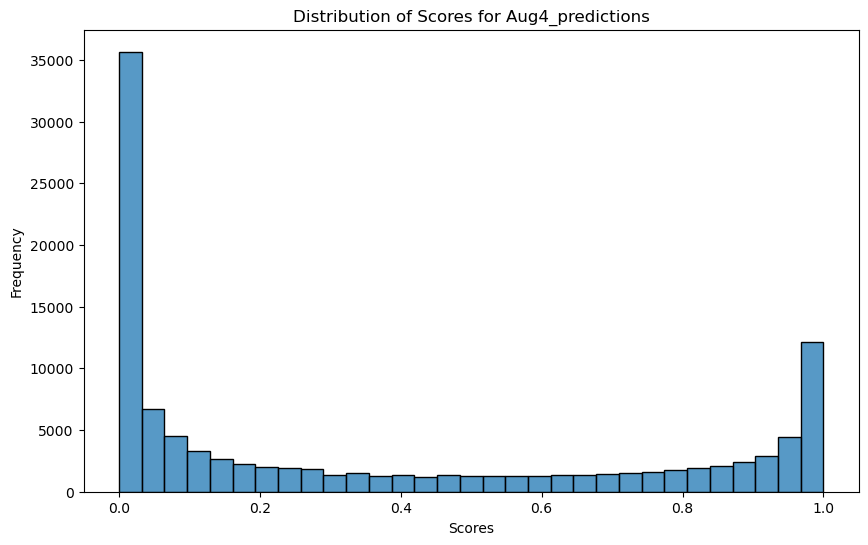

In [7]:
run.visualize_scores()

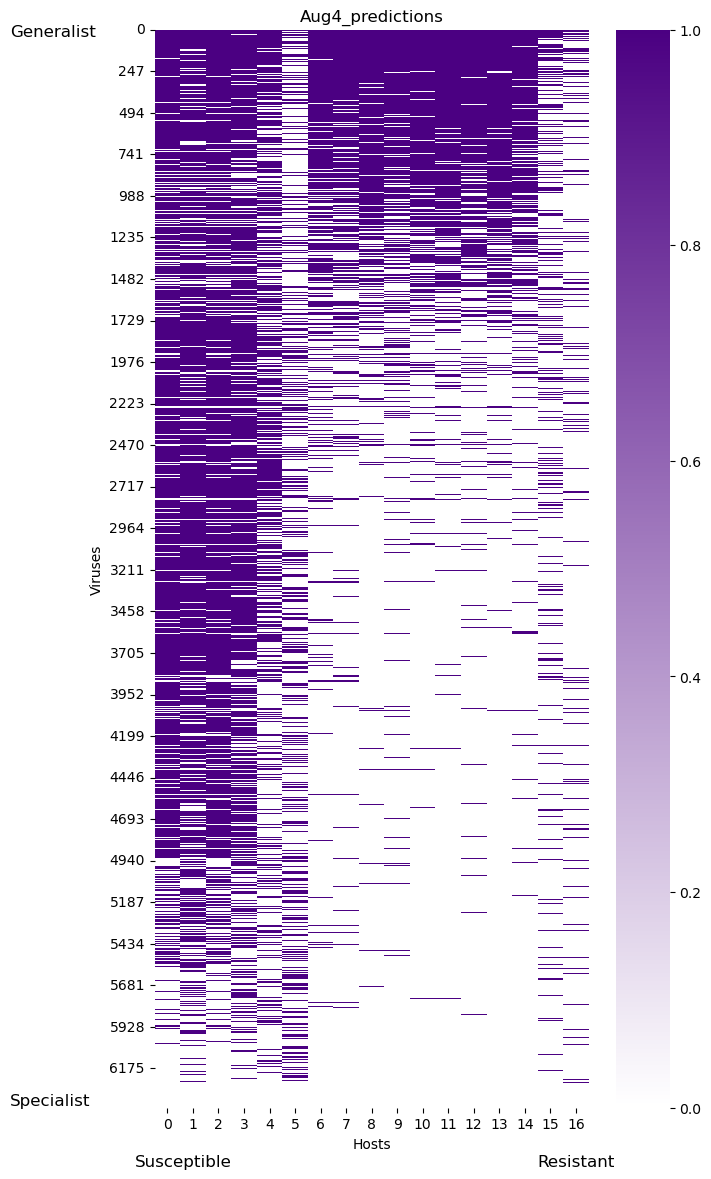

In [8]:
run.visualize_prediction_heatmap(SINGLE_COLOR)

In [ ]:
run.visualize_probability_heatmap(COLORMAP, COLOR_RANGE)

AttributeError: 'Pipeline' object has no attribute 'probability_properties'

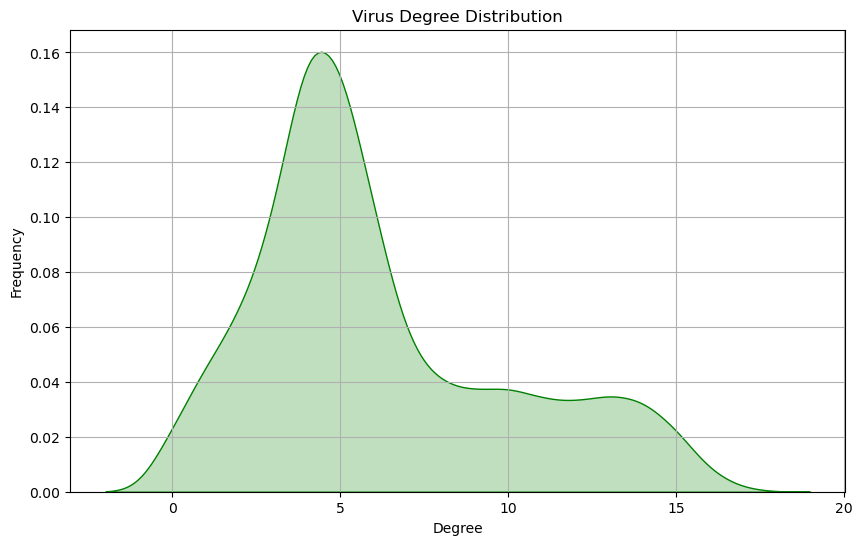

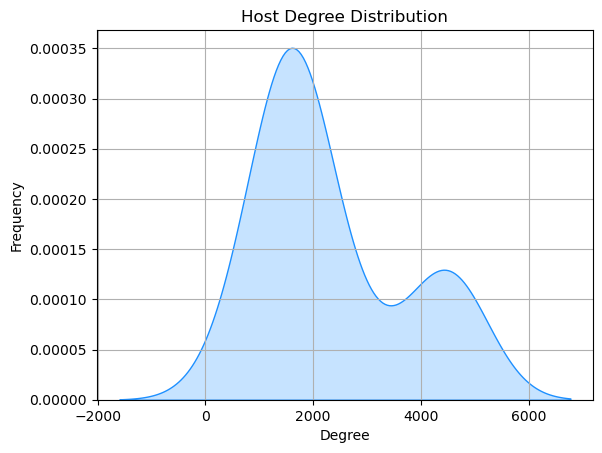

In [9]:
run.visualize_degree_distribution()

<Figure size 1000x600 with 0 Axes>

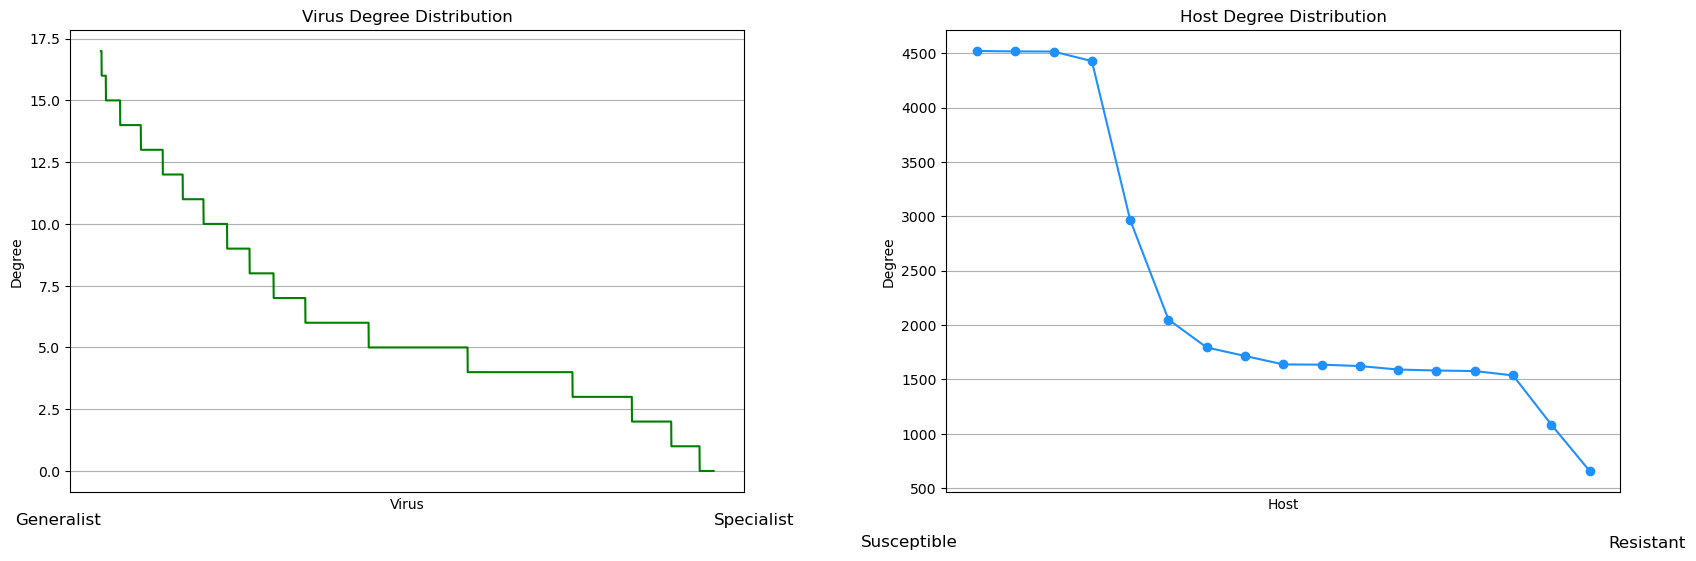

In [10]:
run.visualize_degree_by_species()

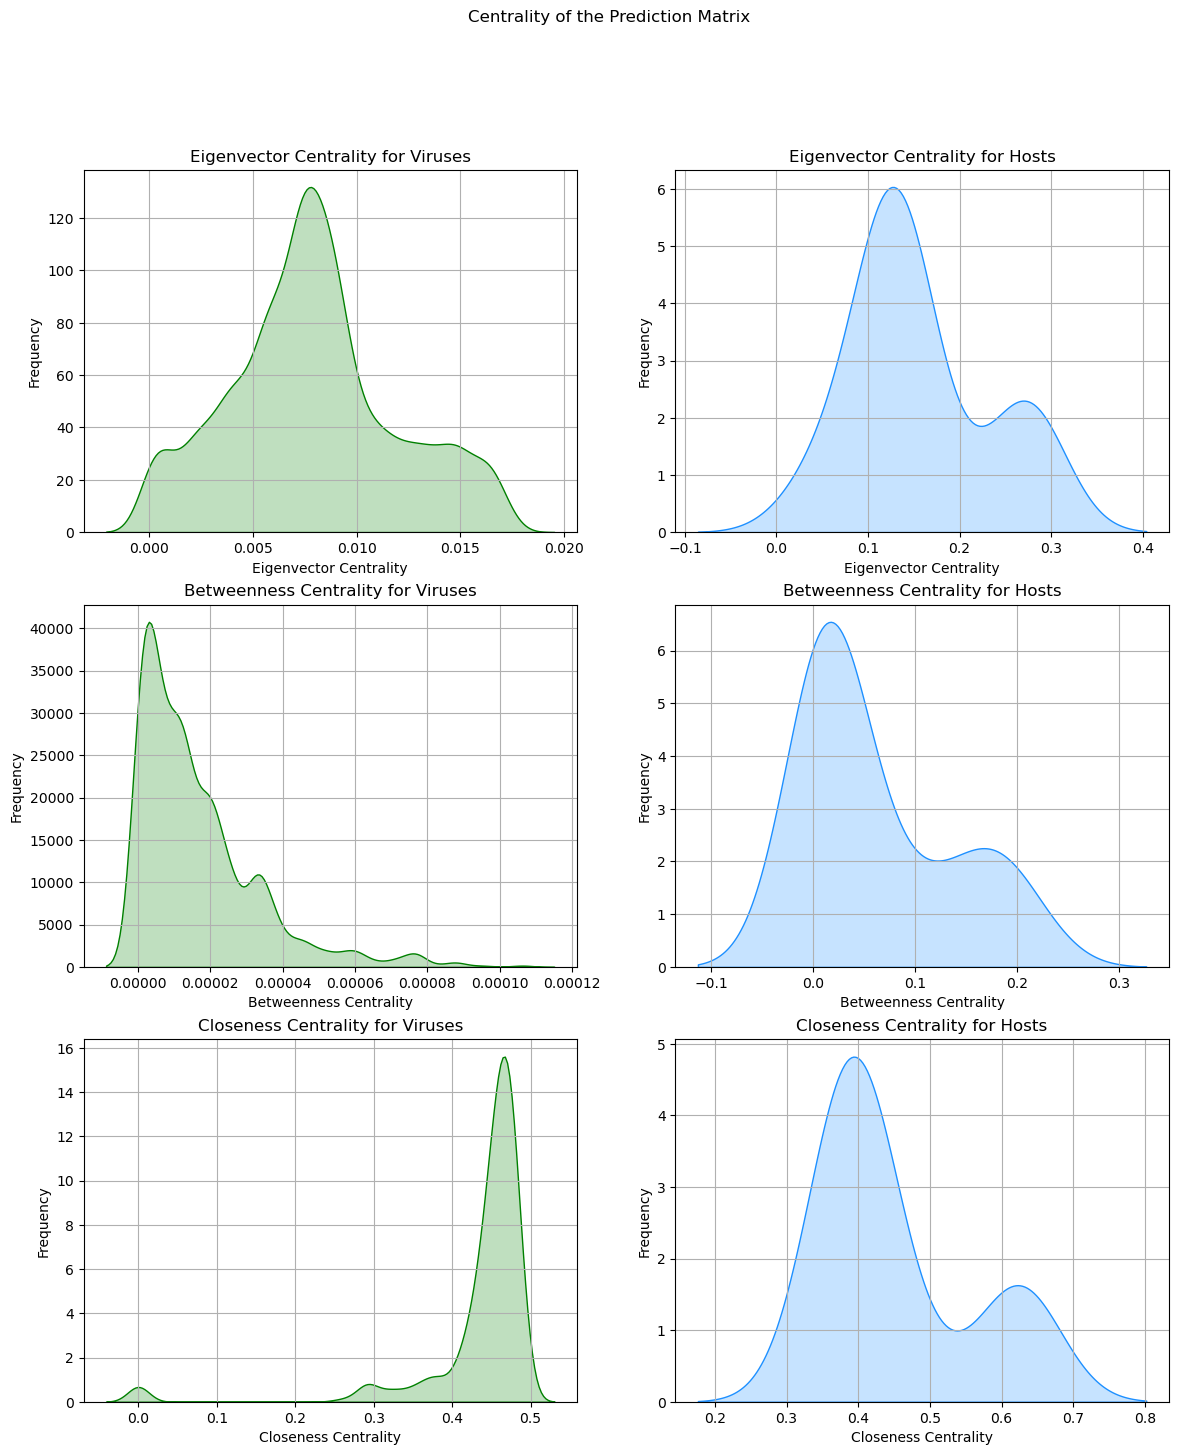

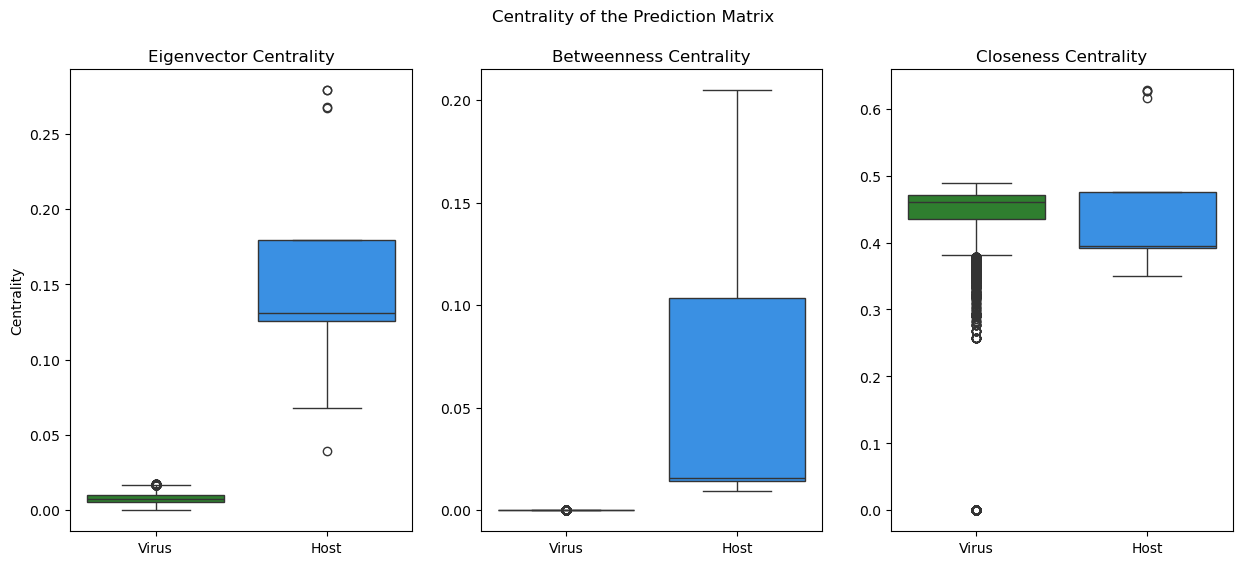

In [13]:
run.visualize_prediction_centrality()

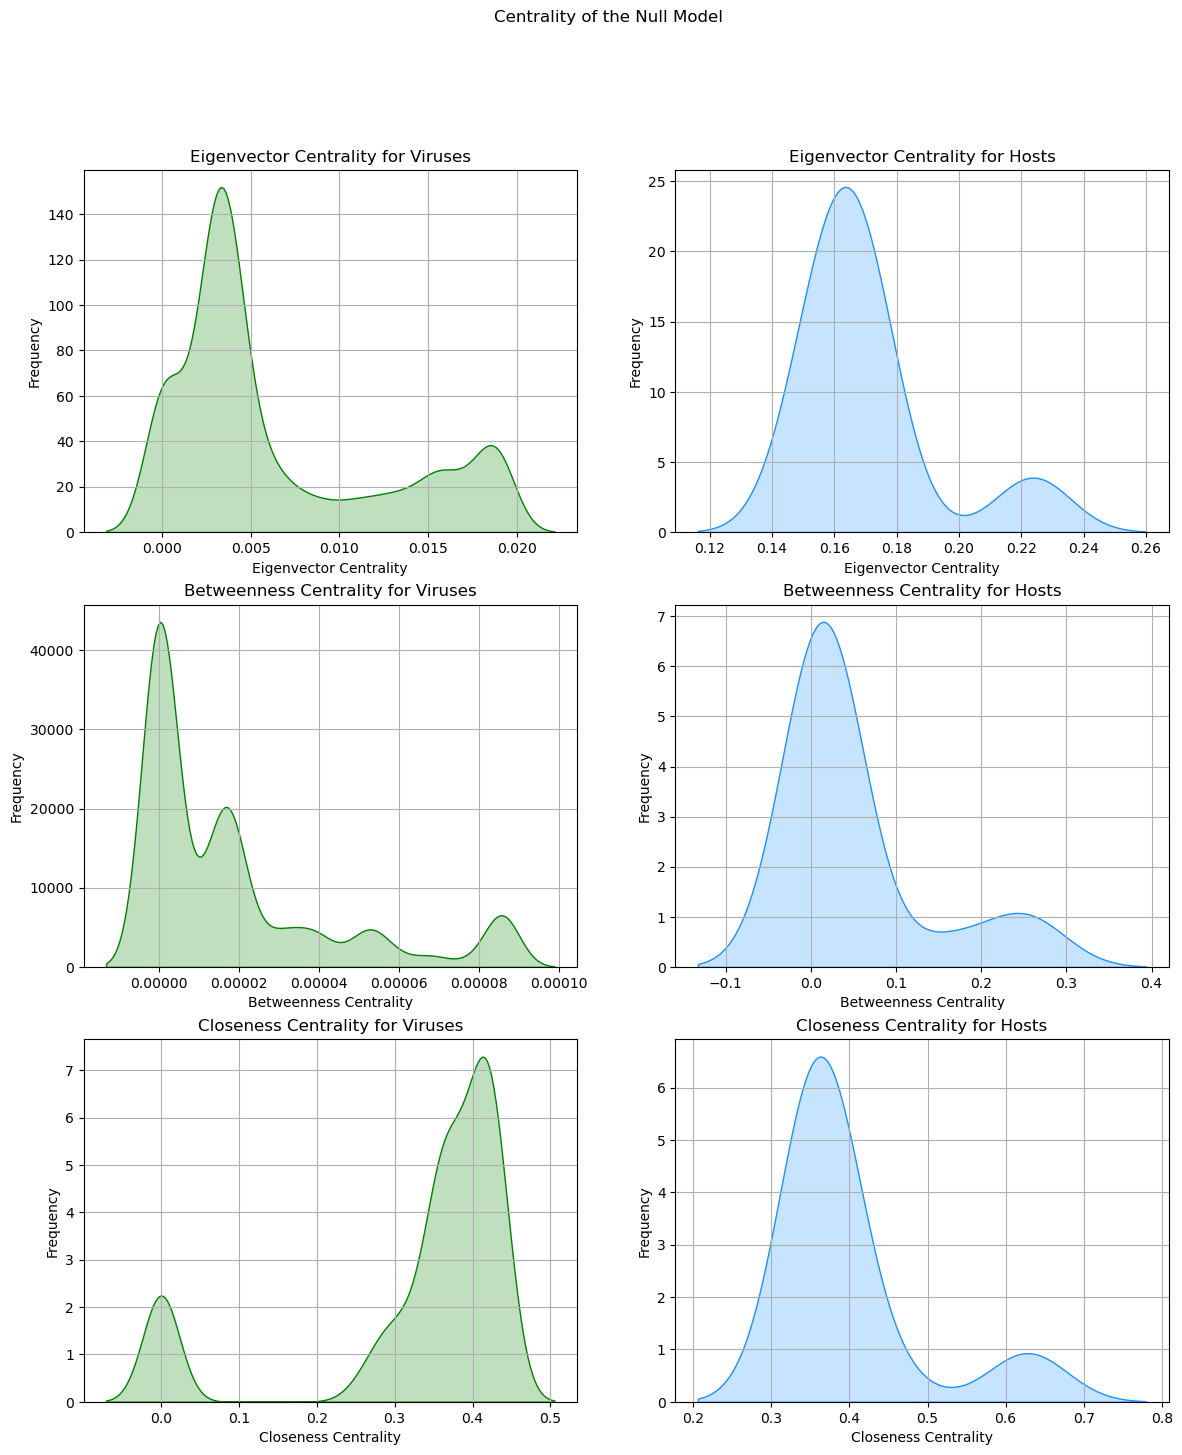

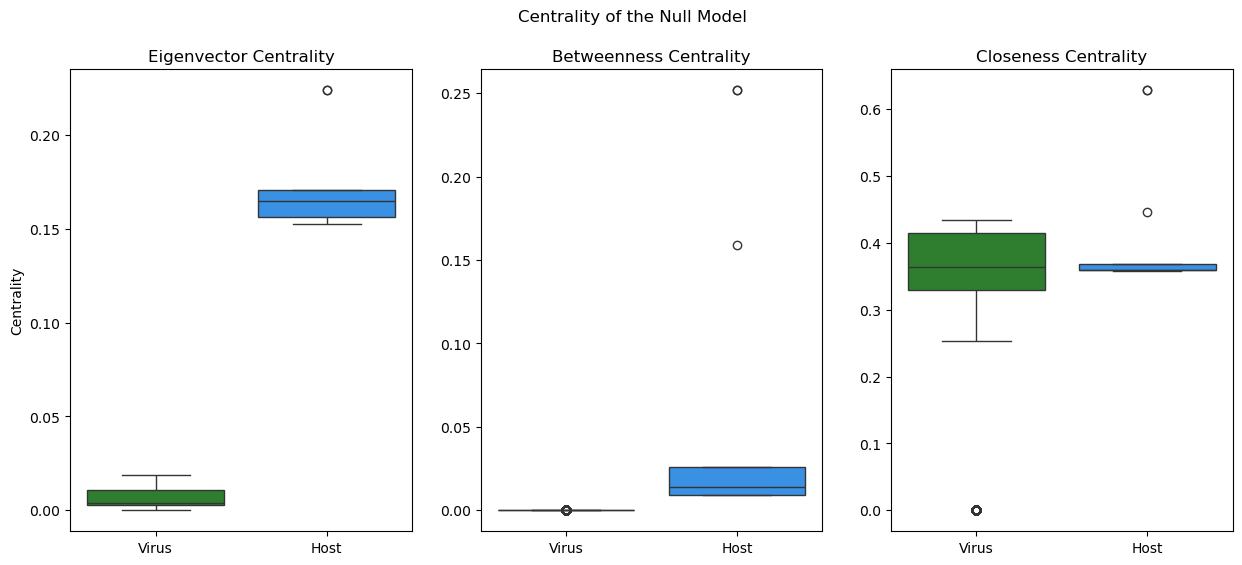

In [12]:
run.visualize_null_centrality()

In [ ]:
run.visualize_centrality_over_i()

In [ ]:
run.visualize_unipartite_projection()

In [ ]:
run.prediction_properties.unipartite_matrix()
for row in range(0, len(run.prediction_properties.unipartite_viruses)):
    print(sum(run.prediction_properties.unipartite_viruses[row]))



## Export the data into tables

In [10]:
run.export_pipeline_data("Results/", "Aug4")

   Nestedness              Type  Number of Swaps
0   61.036139        Prediction             1000
1    0.000000  Null iteration 1             1000
2    0.000000  Null iteration 2             1000
3    0.000000  Null iteration 3             1000
4    0.000000  Null iteration 4             1000
5    0.000000  Null iteration 5             1000
